Epoch: 0050 cost= 0.794248641 W= 0.551247 b= 0.366216
Epoch: 0100 cost= 0.610871017 W= 0.606447 b= -0.170857
Optimization Finished!
Training cost= 0.610871 W= 0.606447 b= -0.170857 

Epoch: 0050 cost= 0.469831318 W= 0.654856 b= -0.641867
Epoch: 0100 cost= 0.361355662 W= 0.697311 b= -1.05494
Epoch: 0150 cost= 0.277925164 W= 0.734544 b= -1.4172
Epoch: 0200 cost= 0.213757172 W= 0.767197 b= -1.7349
Optimization Finished!
Training cost= 0.213757 W= 0.767197 b= -1.7349 

Epoch: 0050 cost= 0.164404556 W= 0.795833 b= -2.01352
Epoch: 0100 cost= 0.126446337 W= 0.820947 b= -2.25787
Epoch: 0150 cost= 0.097252376 W= 0.842971 b= -2.47216
Epoch: 0200 cost= 0.074798562 W= 0.862287 b= -2.6601
Epoch: 0250 cost= 0.057528872 W= 0.879227 b= -2.82491
Epoch: 0300 cost= 0.044246513 W= 0.894082 b= -2.96946
Epoch: 0350 cost= 0.034030803 W= 0.907111 b= -3.09622
Epoch: 0400 cost= 0.026173709 W= 0.918537 b= -3.20739
Epoch: 0450 cost= 0.020130679 W= 0.928557 b= -3.30489
Epoch: 0500 cost= 0.015482972 W= 0.937345 b= 

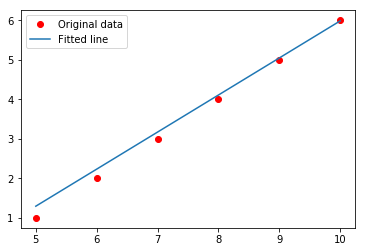

Epoch: 0050 cost= 0.008952972 W= 0.925377 b= -3.39953
Epoch: 0100 cost= 0.008734040 W= 0.926295 b= -3.40692
Optimization Finished!
Training cost= 0.00873404 W= 0.926295 b= -3.40692 

Epoch: 0050 cost= 0.008520450 W= 0.927202 b= -3.41422
Epoch: 0100 cost= 0.008312012 W= 0.928097 b= -3.42143
Epoch: 0150 cost= 0.008108731 W= 0.928982 b= -3.42854
Epoch: 0200 cost= 0.007910416 W= 0.929856 b= -3.43558
Optimization Finished!
Training cost= 0.00791042 W= 0.929856 b= -3.43558 

Epoch: 0050 cost= 0.007716991 W= 0.930719 b= -3.44252
Epoch: 0100 cost= 0.007528213 W= 0.931571 b= -3.44938
Epoch: 0150 cost= 0.007344166 W= 0.932413 b= -3.45615
Epoch: 0200 cost= 0.007164457 W= 0.933245 b= -3.46285
Epoch: 0250 cost= 0.006989304 W= 0.934066 b= -3.46945
Epoch: 0300 cost= 0.006818297 W= 0.934878 b= -3.47598
Epoch: 0350 cost= 0.006651592 W= 0.935679 b= -3.48243
Epoch: 0400 cost= 0.006488836 W= 0.936471 b= -3.4888
Epoch: 0450 cost= 0.006330193 W= 0.937252 b= -3.49509
Epoch: 0500 cost= 0.006175286 W= 0.938024

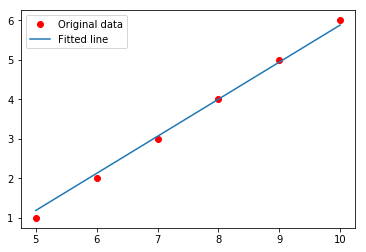

In [3]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

rng = numpy.random

'''# Parameters
learning_rate = 0.04
training_epochs = 1000
display_step = 50'''

learning_rate_list = [0.05, 0.005]
training_epochs_list = [100, 200, 500]
display_step = 50

train_X = numpy.asarray([5.,6.,7.,8.,9.,10.])
train_Y = numpy.asarray([1.,2.,3.,4.,5.,6])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

train_cost = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in learning_rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in training_epochs_list:
            for epoch in range(training_epochs):
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                        "W=", sess.run(W), "b=", sess.run(b))

            print("Optimization Finished!")
            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        train_cost.append(training_cost)
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

C:\Users\Sujay\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


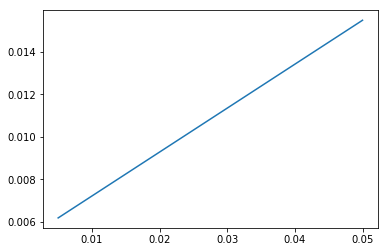

In [4]:

import matplotlib.pyplot as plt
import numpy as np

x = np.array(learning_rate_list)
y = np.array(train_cost)

sess2 = tf.Session()
plt.plot(x, y)
plt.legend()
plt.show()